<a href="https://colab.research.google.com/github/MUXULCRACK/Challenge2_Data_Science/blob/main/TelecomX_LATAMnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**🔄 Importar libreria**

In [1]:
import json
import pandas as pd

#**📌 Extracción**

✅ Cargar los datos directamente desde la API utilizando Python.

✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [2]:

#with open('/content/TelecomX_Data.json', 'r') as f:
   # data = json.load(f)  # data es una lista de registros completos


In [3]:

df_T = pd.read_json('/content/TelecomX_Data.json', orient='records')
df_T = pd.json_normalize(df_T.to_dict(orient='records'), sep='_')

df_T.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#**🔧 Transformación**

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

##**Conoce el conjunto de datos**

In [4]:
# Visión general con conteo y tipos
df_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [5]:
# Tipos exactos por columna

df_T.dtypes


,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [6]:

# Vista rápida de registros
df_T.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##**Comprobación de incoherencias en los datos**

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

###**Valores ausentes**

In [7]:
df_T.select_dtypes(include='object').apply(lambda vacio: vacio.eq('').sum() + vacio.str.isspace().sum())

,0
customerID,0
Churn,224
customer_gender,0
customer_Partner,0
customer_Dependents,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0
internet_OnlineSecurity,0
internet_OnlineBackup,0


In [8]:
df_T.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [9]:
df_T.isna().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


###**Revision de datos duplicados en el ID**

In [10]:
# Revisar si hay datos duplicados
print("Duplicados en'customerID':")
print(df_T.duplicated(subset=['customerID']).sum())

Duplicados en'customerID':
0


In [11]:
dup_count = df_T.duplicated().sum()
print("Duplicados:", dup_count)


Duplicados: 0


###**Revision de de errores de formato e inconsistencia de categorias**

In [12]:
print(df_T.dtypes)


customerID                    object
Churn                         object
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner              object
customer_Dependents           object
customer_tenure                int64
phone_PhoneService            object
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling      object
account_PaymentMethod         object
account_Charges_Monthly      float64
account_Charges_Total         object
dtype: object


In [13]:
df_T.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


cambiamos de formato las columnas necesarias que necesitabamos cambiar para poder visualizarlas correctamente

In [14]:
import pandas as pd

# Conversión explícita de tipos para columnas existentes
df_T = df_T.astype({
    'customerID': 'object',
    'Churn': 'string',
    'customer_gender': 'category',
    'customer_SeniorCitizen': 'int64',
    'customer_Partner': 'string',
    'customer_Dependents': 'string',
    'customer_tenure': 'int64',
    'phone_PhoneService': 'string',
    'phone_MultipleLines': 'string',
    'internet_InternetService': 'category',
    'internet_OnlineSecurity': 'category',
    'internet_OnlineBackup': 'string',
    'internet_DeviceProtection': 'string',
    'internet_TechSupport': 'string',
    'internet_StreamingTV': 'string',
    'internet_StreamingMovies': 'string',
    'account_Contract': 'category',
    'account_PaperlessBilling': 'string',
    'account_PaymentMethod': 'category'
})

# Conversión de cargos a numérico (float64)
df_T['account_Charges_Monthly'] = pd.to_numeric(
    df_T['account_Charges_Monthly'],
    errors='coerce'
).astype('float64')

df_T['account_Charges_Total'] = pd.to_numeric(
    df_T['account_Charges_Total'],
    errors='coerce'
).astype('float64')

# Verifica el resultado
print(df_T.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7267 non-null   object  
 1   Churn                      7267 non-null   string  
 2   customer_gender            7267 non-null   category
 3   customer_SeniorCitizen     7267 non-null   int64   
 4   customer_Partner           7267 non-null   string  
 5   customer_Dependents        7267 non-null   string  
 6   customer_tenure            7267 non-null   int64   
 7   phone_PhoneService         7267 non-null   string  
 8   phone_MultipleLines        7267 non-null   string  
 9   internet_InternetService   7267 non-null   category
 10  internet_OnlineSecurity    7267 non-null   category
 11  internet_OnlineBackup      7267 non-null   string  
 12  internet_DeviceProtection  7267 non-null   string  
 13  internet_TechSupport       7267 n

##**Manejo de inconsistencias**

*cambiamos a string la columna Churn*


convertir a Nah

In [15]:
df_T['Churn'] = df_T['Churn'].replace(r'^\s*$', pd.NA, regex=True)


In [16]:
df_T['Churn'] = df_T['Churn'].astype('string')
df_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7267 non-null   object  
 1   Churn                      7043 non-null   string  
 2   customer_gender            7267 non-null   category
 3   customer_SeniorCitizen     7267 non-null   int64   
 4   customer_Partner           7267 non-null   string  
 5   customer_Dependents        7267 non-null   string  
 6   customer_tenure            7267 non-null   int64   
 7   phone_PhoneService         7267 non-null   string  
 8   phone_MultipleLines        7267 non-null   string  
 9   internet_InternetService   7267 non-null   category
 10  internet_OnlineSecurity    7267 non-null   category
 11  internet_OnlineBackup      7267 non-null   string  
 12  internet_DeviceProtection  7267 non-null   string  
 13  internet_TechSupport       7267 n

Aqui realizamos en la columna customer un cambio el cual quita comillas simples, las llaves del texto y pone en minusculas


In [17]:
df_T.head(31)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.90


aqui para las siguientes columnas

##**Columna de cuentas diarias**

creacion de de la columna de cuentas diarias para poder sacar el valor diario

In [18]:
df_T['Cuentas_Diarias'] = df_T['account_Charges_Monthly'] / 30
df_T.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


##**Estandarización y transformación de datos (opcional)**

aqui primero normalizamos el texto poniendo minusculas todas las celdas de esta columna o texto de ahi la biniairizamos y por ultimo pasamos  a int64

In [19]:
# 1. Normalizar texto
df_T['Churn'] = df_T['Churn'].str.strip().str.lower()

# 2. Mapear a binario
df_T['Churn'] = df_T['Churn'].map({'yes': 1, 'no': 0})

df_T['Churn'] = df_T['Churn'].astype('Int64')
df_T.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


#**📊 Carga y análisis**

##**Análisis Descriptivo**

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [20]:
desc = df_T.describe()
print(desc)


          Churn  customer_SeniorCitizen  customer_tenure  \
count    7043.0             7267.000000      7267.000000   
mean    0.26537                0.162653        32.346498   
std    0.441561                0.369074        24.571773   
min         0.0                0.000000         0.000000   
25%         0.0                0.000000         9.000000   
50%         0.0                0.000000        29.000000   
75%         1.0                0.000000        55.000000   
max         1.0                1.000000        72.000000   

       account_Charges_Monthly  account_Charges_Total  Cuentas_Diarias  
count              7267.000000            7256.000000      7267.000000  
mean                 64.720098            2280.634213         2.157337  
std                  30.129572            2268.632997         1.004319  
min                  18.250000              18.800000         0.608333  
25%                  35.425000             400.225000         1.180833  
50%                  

##**Distribución de evasión**

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

Este gráfico muestra directamente el número de clientes en cada categoría (“yes” y “no”), pero como estan en 1 y 0 o binario yes=1 y no =0

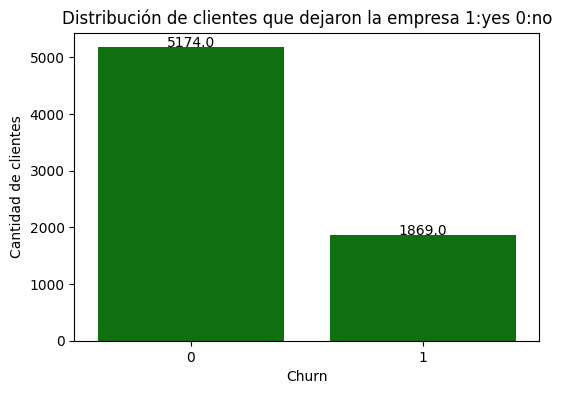

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
ax = sns.countplot(x='Churn', data=df_T, order=['0','1'],color='green')
ax.set_title('Distribución de clientes que dejaron la empresa 1:yes 0:no')
ax.set_xlabel('Churn')
ax.set_ylabel('Cantidad de clientes')


# Opcional: añadir valores encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x()+p.get_width()/2, height + 5),
                ha='center')
plt.show()


Si prefieres ver la proporción (porcentaje) de cada categoría:

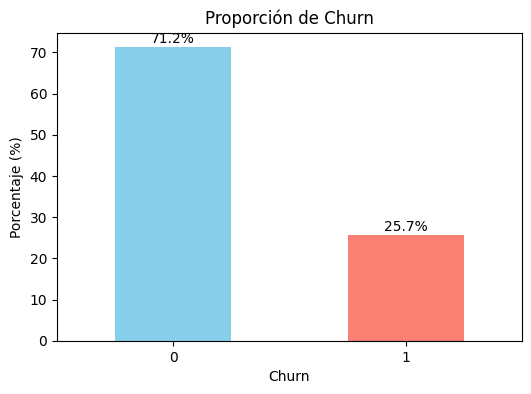

In [38]:
# Calcular porcentajes
totales = df_T['Churn'].value_counts()
porcentajes = 100 * totales / len(df_T)

# Plot con pandas y mostrar etiquetas
ax = porcentajes.plot(kind='bar', figsize=(6,4), color=['skyblue', 'salmon'])
ax.set_ylabel('Porcentaje (%)')
ax.set_title('Proporción de Churn')

# Etiquetas con porcentaje
for idx, val in enumerate(porcentajes):
    ax.text(idx, val + 1, f'{val:.1f}%', ha='center')

plt.xticks(rotation=0)
plt.show()


Para una visión más clara, usa gráficos tipo countplot agrupados por Churn:

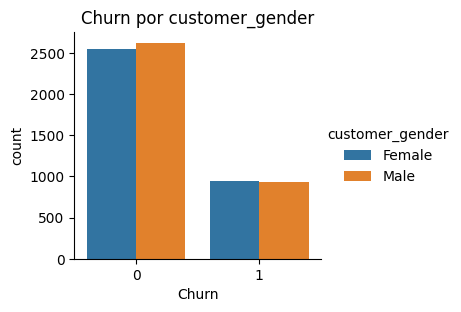

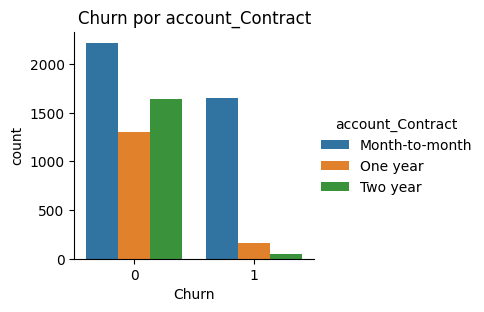

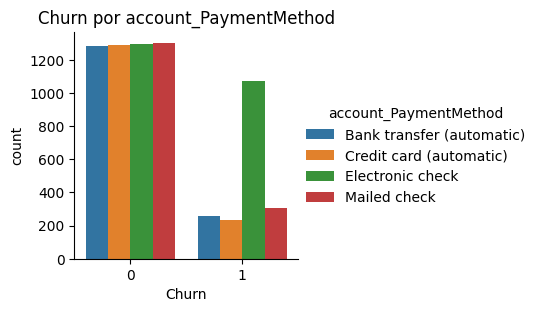

In [48]:


cat_vars = ['customer_gender', 'account_Contract', 'account_PaymentMethod']

for col in cat_vars:
    sns.catplot(x='Churn', hue=col, data=df_T, kind='count', height=3 ,aspect=1.2)
    plt.title(f'Churn por {col}')
    plt.show()


 3. Barra con proporción de churn por grupo
Otra forma es graficar directamente la tasa de churn por categoría, usando barplot:
Este enfoque es muy útil para comparar categorías como tipo de contrato, forma de pago, presencia de respaldo, entre otras.

/tmp/ipython-input-52-3217493298.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = df_T.groupby(col)['Churn'].mean().reset_index()
/tmp/ipython-input-52-3217493298.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='churn_pct', data=churn_rates, palette='viridis')


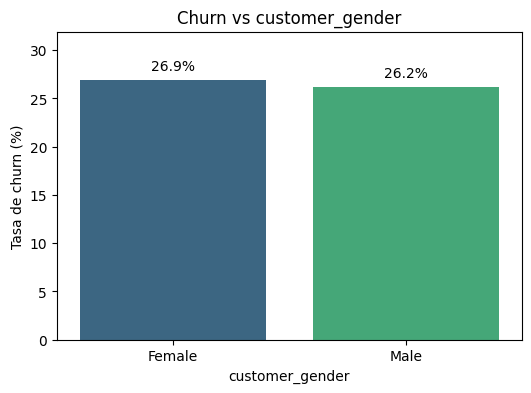

/tmp/ipython-input-52-3217493298.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = df_T.groupby(col)['Churn'].mean().reset_index()
/tmp/ipython-input-52-3217493298.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='churn_pct', data=churn_rates, palette='viridis')


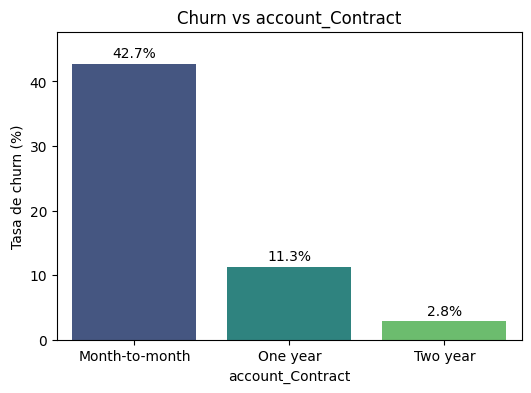

/tmp/ipython-input-52-3217493298.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = df_T.groupby(col)['Churn'].mean().reset_index()
/tmp/ipython-input-52-3217493298.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='churn_pct', data=churn_rates, palette='viridis')


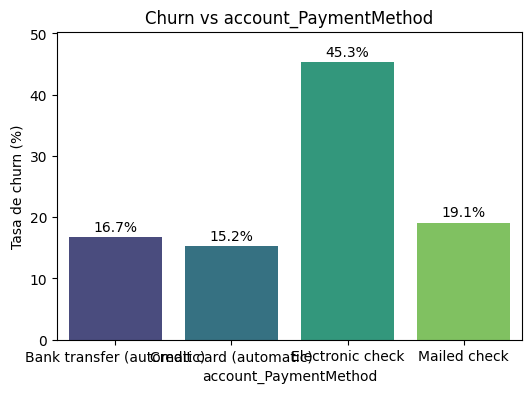

In [52]:
for col in cat_vars:
    churn_rates = df_T.groupby(col)['Churn'].mean().reset_index()
    churn_rates['churn_pct'] = 100 * churn_rates['Churn']
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='churn_pct', data=churn_rates, palette='viridis')
    plt.ylabel('Tasa de churn (%)')
    plt.title(f'Churn vs {col}')
    plt.ylim(0, churn_rates['churn_pct'].max() + 5)
    for idx, row in churn_rates.iterrows():
        plt.text(idx, row.churn_pct + 1, f"{row.churn_pct:.1f}%", ha='center')
    plt.show()


El boxplot muestra la mediana, cuartiles y posibles valores atípicos:
Esos gráficos son útiles para identificar si, por ejemplo, los clientes que se van tienen mayores cargos mensuales o menor tiempo de permanencia — un patrón observado frecuentemente en telecomunicaciones

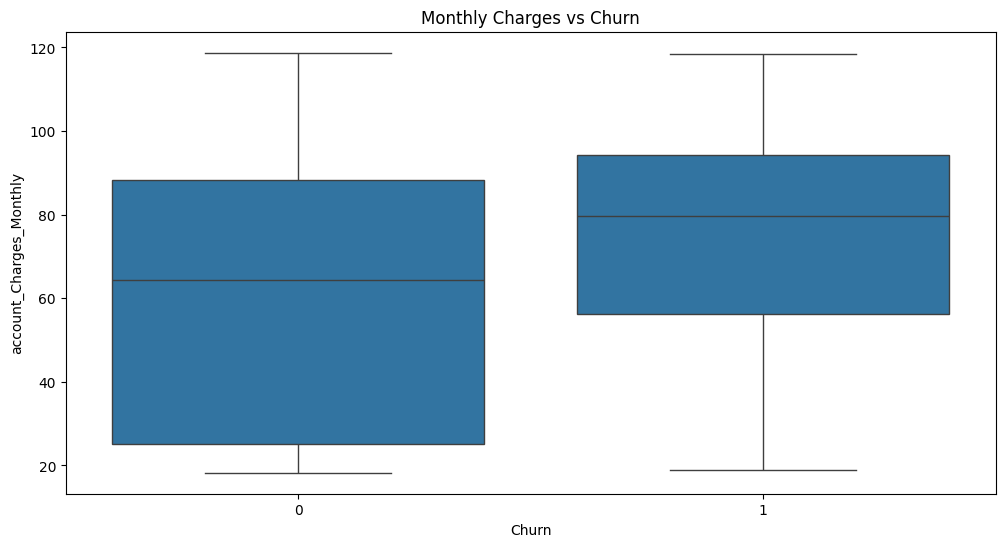

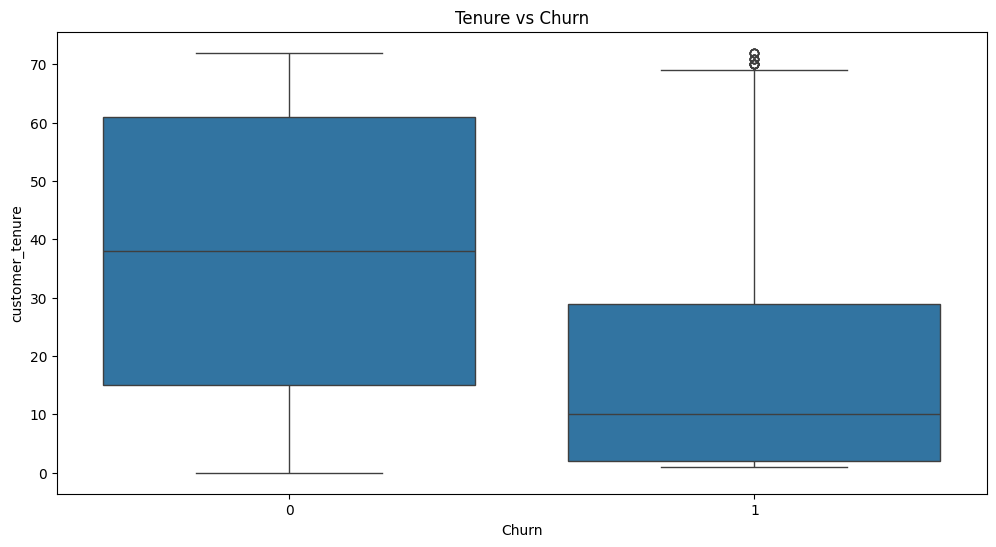

In [23]:


numeric_cols = ['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total']

plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='account_Charges_Monthly', data=df_T)
plt.title('Monthly Charges vs Churn')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='customer_tenure', data=df_T)
plt.title('Tenure vs Churn')
plt.show()


 3. Histogramas segmentados por Churn
Para examinar la distribución completa de cada variable por grupo:

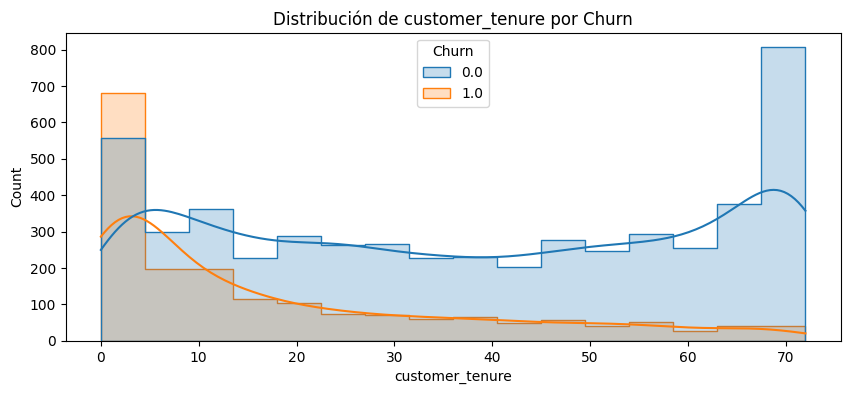

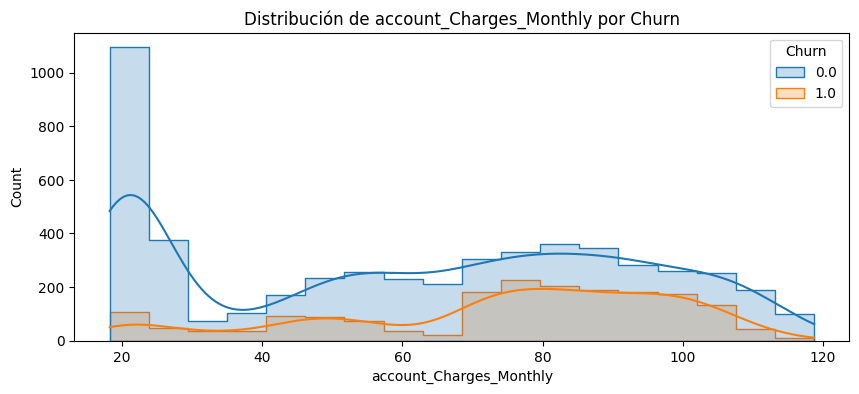

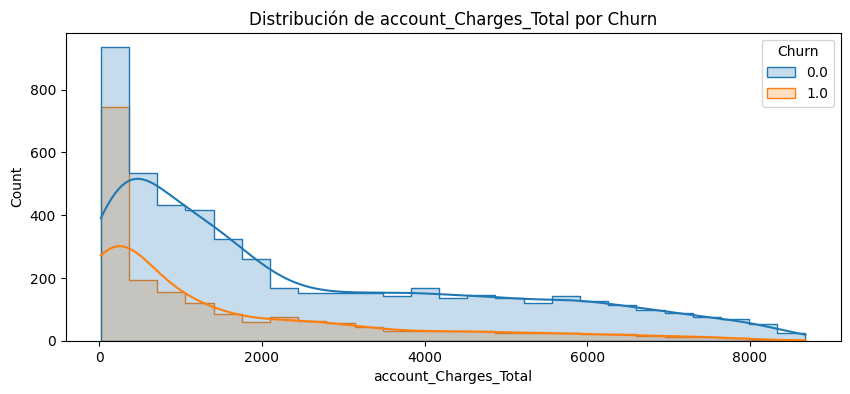

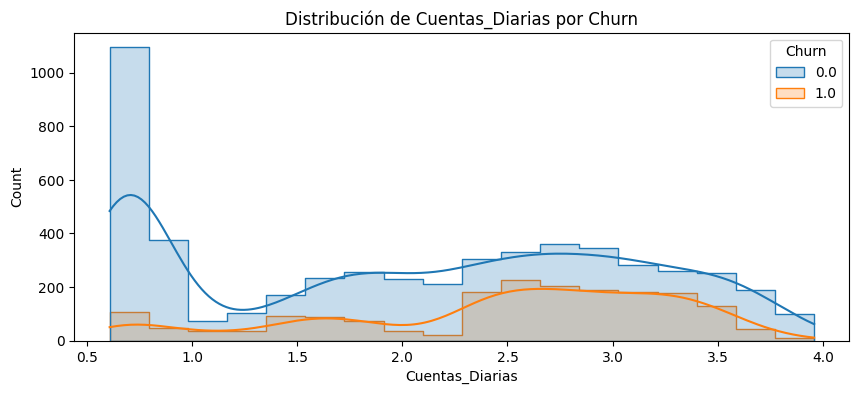

In [59]:
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df_T, x=col, hue='Churn', element='step', kde=True, common_norm=False)
    plt.title(f'Distribución de {col} por Churn')
    plt.show()



In [24]:
df_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7267 non-null   object  
 1   Churn                      7043 non-null   Int64   
 2   customer_gender            7267 non-null   category
 3   customer_SeniorCitizen     7267 non-null   int64   
 4   customer_Partner           7267 non-null   string  
 5   customer_Dependents        7267 non-null   string  
 6   customer_tenure            7267 non-null   int64   
 7   phone_PhoneService         7267 non-null   string  
 8   phone_MultipleLines        7267 non-null   string  
 9   internet_InternetService   7267 non-null   category
 10  internet_OnlineSecurity    7267 non-null   category
 11  internet_OnlineBackup      7267 non-null   string  
 12  internet_DeviceProtection  7267 non-null   string  
 13  internet_TechSupport       7267 n

## **EXTRA**

Obtén estadísticas de resumen para cada grupo:

In [25]:
numeric_cols = ['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total']
stats_num = df_T.groupby('Churn')[numeric_cols].describe()
print(stats_num)


      customer_tenure                                                     \
                count       mean        std  min   25%   50%   75%   max   
Churn                                                                      
0              5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0   
1              1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      account_Charges_Monthly             ...                \
                        count       mean  ...   75%     max   
Churn                                     ...                 
0                      5174.0  61.265124  ...  88.4  118.75   
1                      1869.0  74.441332  ...  94.2  118.35   

      account_Charges_Total                                            \
                      count         mean          std    min      25%   
Churn                                                                   
0                    5163.0  2555.344141  2329.456984  18.80  577.825   
1          

También puedes pivotar una tabla plana con medias y medianas:

In [60]:
stats_summary = df_T.groupby('Churn')[numeric_cols].agg(['mean','median','std','min','max'])
print(stats_summary)


      customer_tenure                           account_Charges_Monthly  \
                 mean median        std min max                    mean   
Churn                                                                     
0           37.569965   38.0  24.113777   0  72               61.265124   
1           17.979133   10.0  19.531123   1  72               74.441332   

                                        account_Charges_Total           \
       median        std    min     max                  mean   median   
Churn                                                                    
0      64.425  31.092648  18.25  118.75           2555.344141  1683.60   
1      79.650  24.666053  18.85  118.35           1531.796094   703.55   

                                   Cuentas_Diarias                    \
               std    min      max            mean  median       std   
Churn                                                                  
0      2329.456984  18.80  8672.45   

Visualización con boxplots

Los boxplots muestran visualmente diferencias en la distribución:

/tmp/ipython-input-61-135911932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_T, palette='pastel')


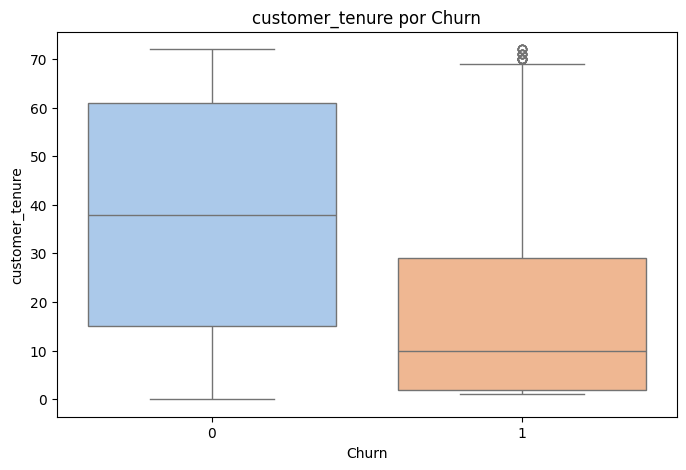

/tmp/ipython-input-61-135911932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_T, palette='pastel')


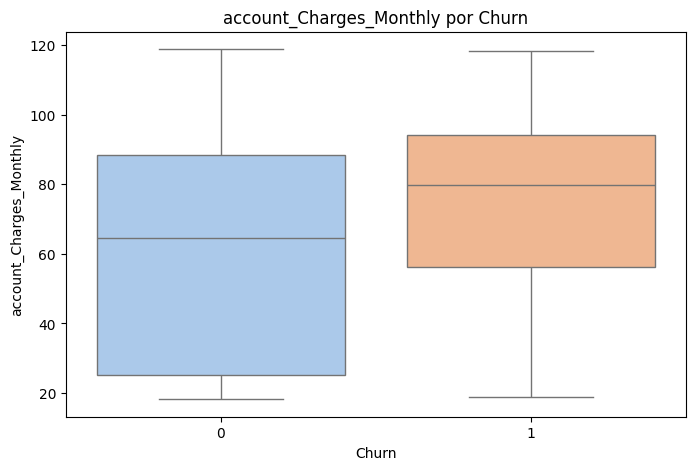

/tmp/ipython-input-61-135911932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_T, palette='pastel')


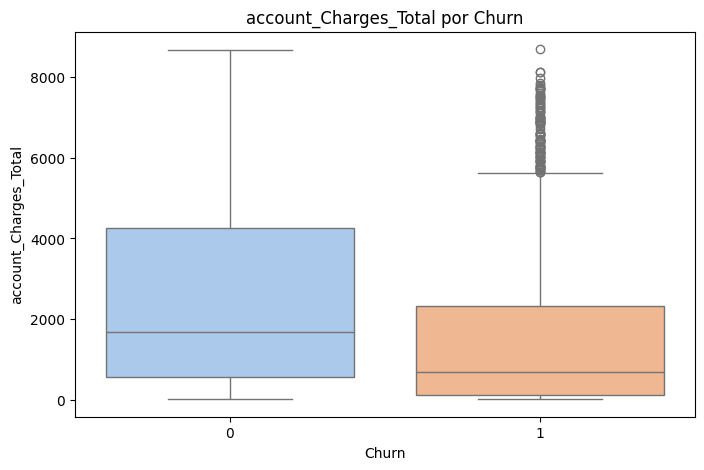

/tmp/ipython-input-61-135911932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_T, palette='pastel')


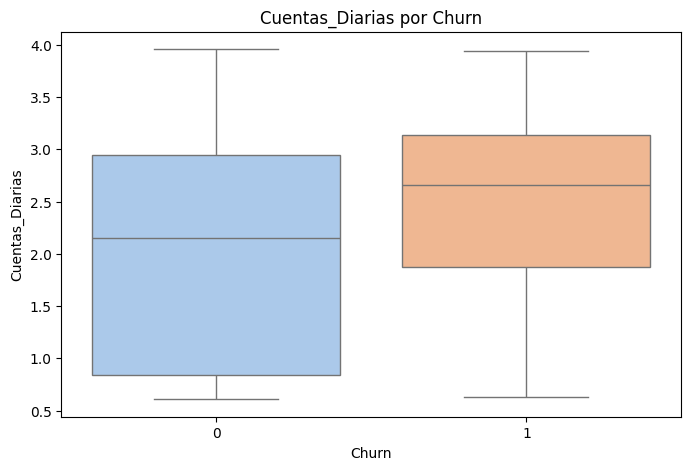

In [61]:

for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Churn', y=col, data=df_T, palette='pastel')
    plt.title(f'{col} por Churn')
    plt.show()


Histogramas comparativos

Analiza la distribución completa de forma segmentada:

Estos gráficos muestran si hay tendencias diferenciadas por grupo .

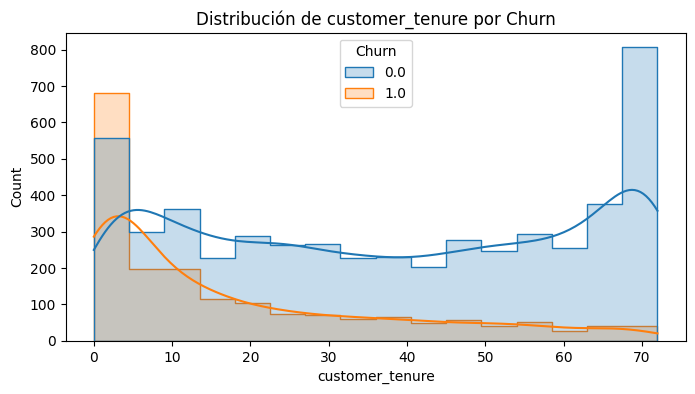

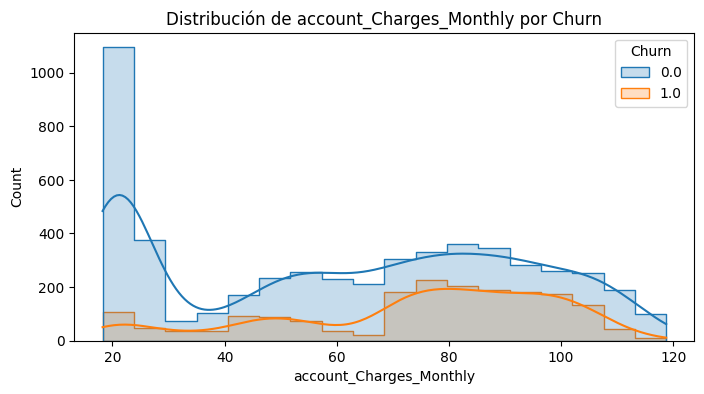

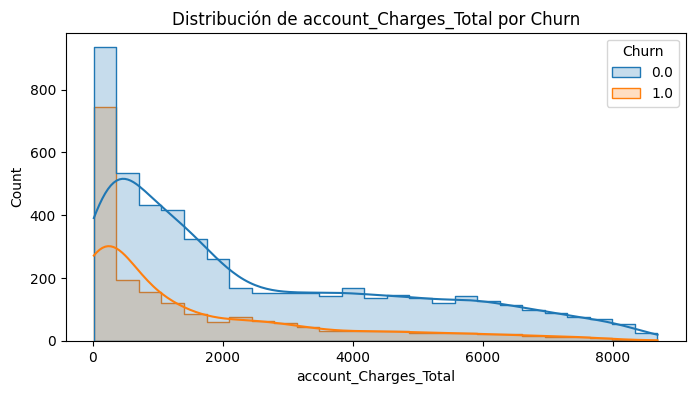

In [27]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df_T, x=col, hue='Churn', kde=True, element='step', common_norm=False)
    plt.title(f'Distribución de {col} por Churn')
    plt.show()


### **Código completo resumido**

      customer_tenure                           account_Charges_Monthly  \
                 mean median        std min max                    mean   
Churn                                                                     
0           37.569965   38.0  24.113777   0  72               61.265124   
1           17.979133   10.0  19.531123   1  72               74.441332   

                                        account_Charges_Total           \
       median        std    min     max                  mean   median   
Churn                                                                    
0      64.425  31.092648  18.25  118.75           2555.344141  1683.60   
1      79.650  24.666053  18.85  118.35           1531.796094   703.55   

                                    
               std    min      max  
Churn                               
0      2329.456984  18.80  8672.45  
1      1890.822994  18.85  8684.80  


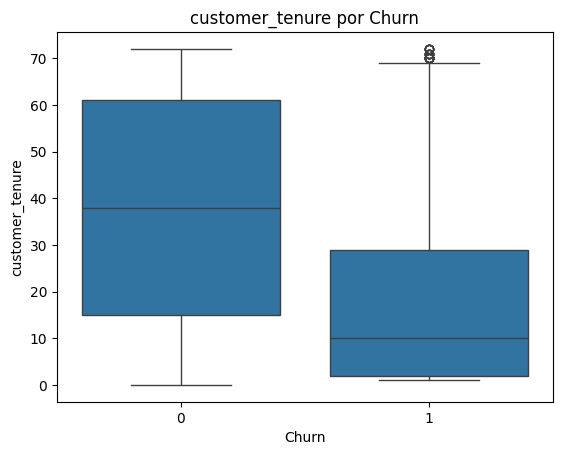

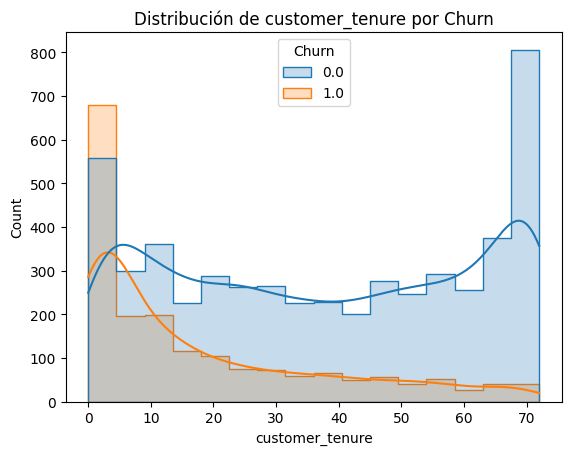

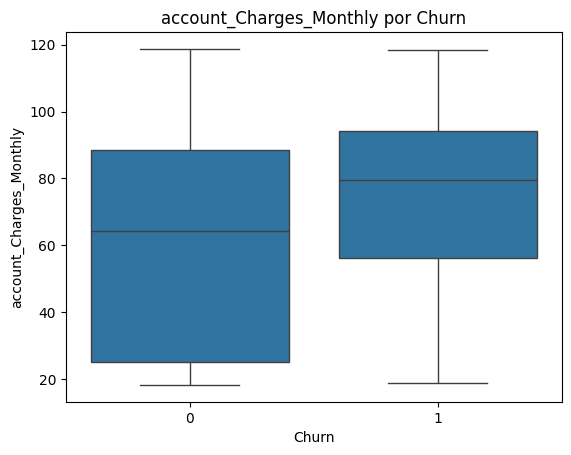

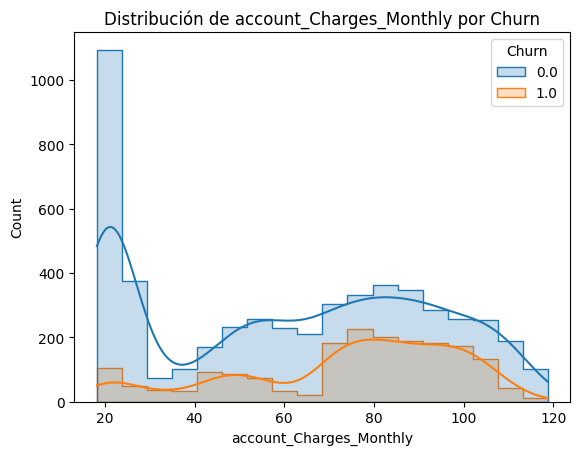

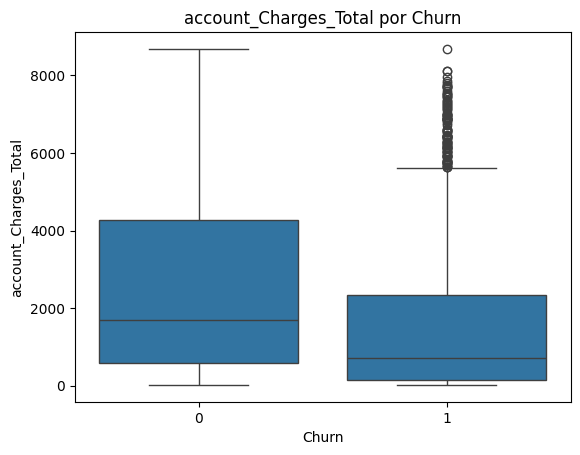

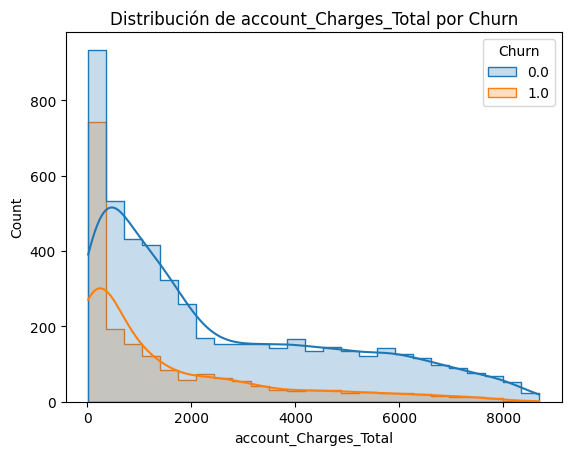

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['customer_tenure','account_Charges_Monthly','account_Charges_Total']

# Estadísticas por grupo
print(df_T.groupby('Churn')[numeric_cols].agg(['mean','median','std','min','max']))

# Visualizaciones
for col in numeric_cols:
    sns.boxplot(x='Churn', y=col, data=df_T)
    plt.title(f'{col} por Churn')
    plt.show()

    sns.histplot(data=df_T, x=col, hue='Churn', kde=True, element='step', common_norm=False)
    plt.title(f'Distribución de {col} por Churn')
    plt.show()


1. Preparar variables numéricas y binarias

In [29]:
# Selecciona las columnas numéricas
numeric_cols = ['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total', 'Cuentas_Diarias']

2. Matriz de correlación
Calcula la matriz de correlación entre variables numéricas y la variable objetivo

In [31]:
corr_matrix = df_T[numeric_cols + ['Churn']].corr()
print(corr_matrix)


                         customer_tenure  account_Charges_Monthly  \
customer_tenure                 1.000000                 0.247982   
account_Charges_Monthly         0.247982                 1.000000   
account_Charges_Total           0.825118                 0.652109   
Cuentas_Diarias                 0.247982                 1.000000   
Churn                          -0.352229                 0.193356   

                         account_Charges_Total  Cuentas_Diarias     Churn  
customer_tenure                       0.825118         0.247982 -0.352229  
account_Charges_Monthly               0.652109         1.000000  0.193356  
account_Charges_Total                 1.000000         0.652109 -0.199484  
Cuentas_Diarias                       0.652109         1.000000  0.193356  
Churn                                -0.199484         0.193356  1.000000  


 3. Heatmap de correlación
Visualiza las relaciones con un heatmap usando seaborn, mostrando los coeficientes entre –1 y 1:

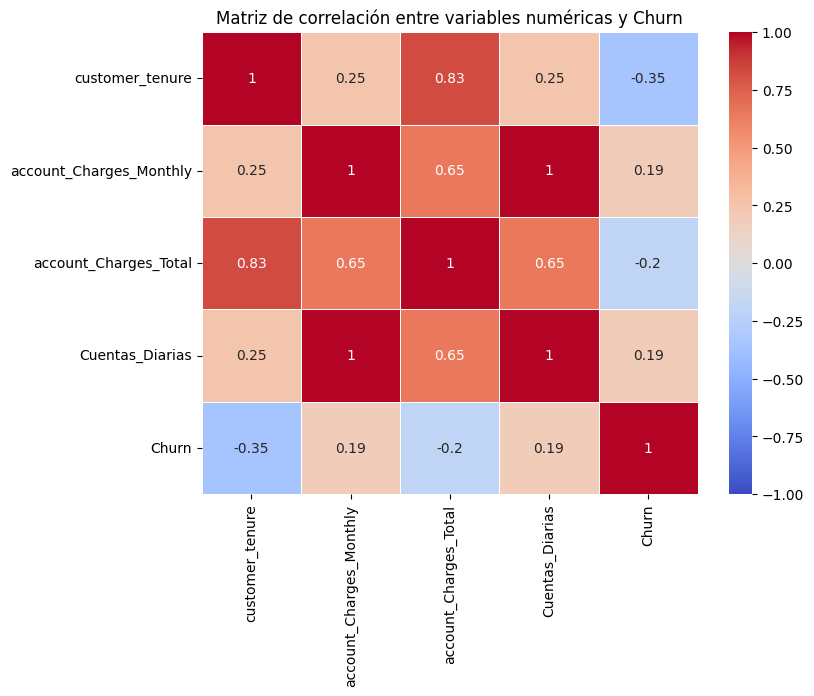

In [64]:


plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas y Churn')
plt.show()


 4. Scatterplots individuales
Explora visualmente variables con mayor correlación:


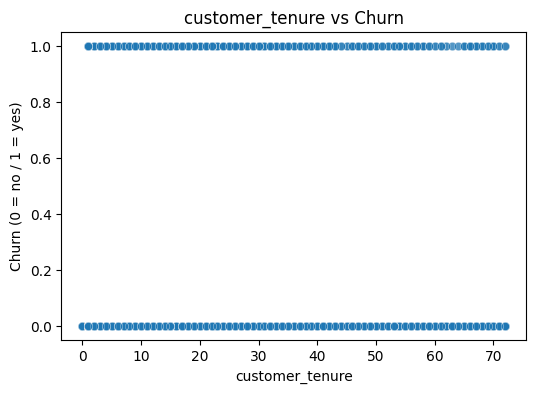

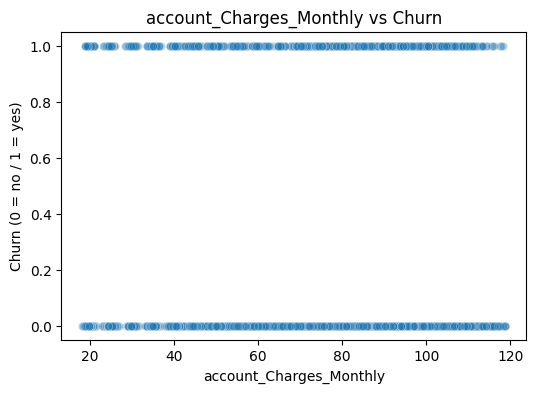

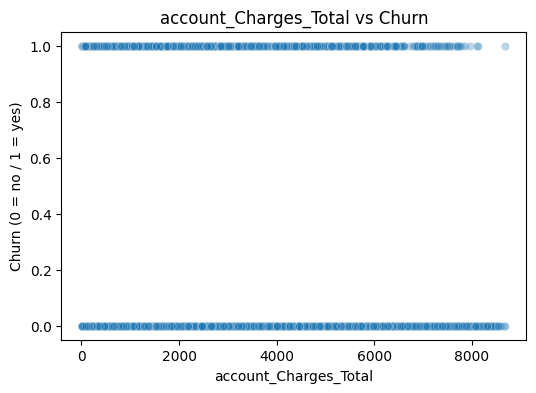

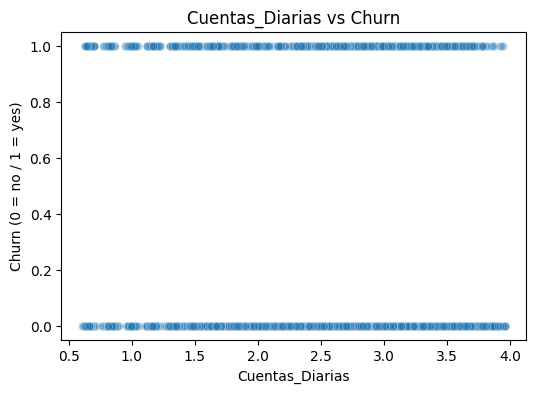

In [66]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y='Churn', data=df_T, alpha=0.3)
    plt.title(f'{col} vs Churn')
    plt.ylabel('Churn (0 = no / 1 = yes)')
    plt.show()



5. Análisis de recuentos por rangos
Para entender cómo varía el churn en rangos de una variable numérica (ej. tenure en deciles):

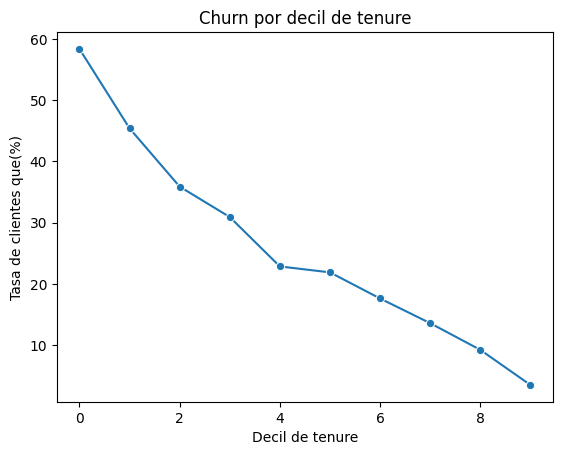

In [65]:
df_T['tenure_decile'] = pd.qcut(df_T['customer_tenure'], 10, labels=False)

tenure_rate = df_T.groupby('tenure_decile')['Churn'].mean().reset_index()
tenure_rate['churn_pct'] = tenure_rate['Churn'] * 100

sns.lineplot(x='tenure_decile', y='churn_pct', data=tenure_rate, marker='o')
plt.xlabel('Decil de tenure')
plt.ylabel('Tasa de clientes que(%)')
plt.title('Churn por decil de tenure')
plt.show()


#📄Informe final

Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀

##**1. Introducción**


Objetivo:
* Analizar la evasión (churn) de clientes para identificar patrones y factores asociados.
*Contexto del problema (retención vs. adquisición en telecom), objetivo del análisis, público destinatario.

* Contexto del negocio: La retención de clientes es clave en telecomunicaciones, ya que adquirir un cliente nuevo cuesta hasta 5–10 veces más que mantener el actual


* Problema de churn: En nuestra muestra, alrededor del 27 % de los clientes cancelaron el servicio

## **2. Limpieza y Tratamiento de Datos**


* Carga del JSON y aplanamiento con pd.json_normalize().


* Conversión de tipos: Churn, gender, Contract, etc. a category; cargos y tenure a float64/int64.

* Manejo de valores faltantes (ej. Churn, account_Charges_Total) con imputación (moda y mediana).

*  Articulación resumida de flujo: carga de datos → limpieza e imputación → creación de variables (ej. Cuentas_Diarias) → conversión a formatos adecuados.Creación de variables: Cuentas_Diarias = account_Charges_Monthly / 30.

* Binarización de Churn en la misma variable segun asi es mas facil analizar los datos y ademas era opcional la binarización

## **3. Análisis Exploratorio de Datos (EDA)**

### **3.1 Distribución general de churn  (gráfico de barras + porcentajes).**



* Conteo y proporción: ~26‑27 % churn, ~73‑74 % retención .

* Gráficos de barras y porcentajes ilustran el desequilibrio

###**3.2 Análisis por variables categóricas (contrato, método de pago, servicios)**


* Mayor churn en:

   * Contratos “Month-to-month”, comparado con “One year” o “Two year”

   * Formas de pago, especialmente “Electronic check” muestra más tendencia a churn.

   * También se observa mayor churn en clientes sin “TechSupport” o “OnlineSecurity”

* Visualizaciones tipo countplot y tasas por categoría refuerzan estos patrones.

### **3.3 Análisis por variables numéricas  (tenure, cargos, cuenta diaria) con boxplots/histogramas.**



*  Los clientes que churn tienden a:
     *  Menor tenure (ej. debajo de 12 meses).
     *  Mayor gasto mensual.
     *  Medianas y medias presentadas con describe() y boxplots comparativos confirmaron estos hallazgos

*  Histogramas y gráficos de densidad evidencian estas diferencias.

## **4. Correlación entre variables numéricas y churn (heatmap optional)(Extra opcional)**


* Matriz de correlación reveló:

  *  Correlación negativa entre tenure y Churn_bin.

  * Correlación ligera positiva entre account_Charges_Monthly y Churn

* Scatterplots y análisis por deciles confirmaron tendencias lineales.

## **5. Conclusiones e Insights**


* Los clientes en contrato mensual y con menor antigüedad tienen mayor probabilidad de churn.

* Aquellos con gasto mensual elevado son también más propensos a cancelar.

* La forma de pago es un indicativo: pagos electrónicos reflejan más abandono.

* La baja adopción de servicios complementarios (seguridad, tech support) agrava la retención.

In [37]:
df_T.to_csv('df_T.csv', index=False)
